In [4]:
from sklearn import tree
from wine_quality.csv_data_parser import CsvDataParser
from random import sample
import matplotlib.pyplot as plt
import numpy as np
import pylab

RED_PATH = r'..\data\winequality-red.csv'
WHITE_PATH = r'..\data\winequality-white.csv'


def get_red_white_data():
    _, X, y = CsvDataParser.get_data(RED_PATH)
    _, X2, y2 = CsvDataParser.get_data(WHITE_PATH)
    X.extend(X2)
    y.extend(y2)

    return X, y

def split_data(X, y, training_factor=0.8):
    data = list(zip(X, y))
    shuffled_data = sample(data, len(data))
    training_data_size = int(training_factor * len(data))

    training_X = [row[0] for row in shuffled_data[:training_data_size]]
    training_y = [row[1] for row in shuffled_data[:training_data_size]]
    test_X = [row[0] for row in shuffled_data[training_data_size:]]
    test_y = [row[1] for row in shuffled_data[training_data_size:]]

    return training_X, training_y, test_X, test_y


def extract_features(X, features):
    return [[row[index] for index in features] for row in X]


def create_figure(x_label, y_label, title):
    fig = plt.figure()
    axes = fig.add_subplot(111)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    fig.suptitle(title)

def plot_2D(clf, bounds):
    plt.scatter(bounds, [clf.predict(x) for x in bounds])
    plt.show()

def alcohol_plot(clf):
    # plot the 2D chart
    create_figure('alcohol', 'quality', 'Regression Tree model based on alcohol feature')
    plot_2D(clf, numpy.arange(10, 30, 0.001))

def measure_accuracy(clf, X, y):
    predictions = clf.predict(X)
    diff_array = [1 if pred_output == output else 0 for pred_output, output in zip(predictions, y)]
    n_correct = sum(diff_array)
    
    return n_correct/len(diff_array)

from sklearn.ensemble import ExtraTreesClassifier

def extract_class(X, y, cat=0):
    new_X, new_y = [], []
    for x_val, y_val in zip(X, y):
        if y_val != cat:
            continue
        new_X.append(x_val)
        new_y.append(y_val)
    return new_X, new_y

def get_feature_importances(X, y):
    clf = ExtraTreesClassifier()
    clf = clf.fit(X, y)
    return clf.feature_importances_

def pretty_print(to_print, prefix_line='', suffix_line=''):
    if prefix_line:
        print('--------------------', prefix_line, '--------------------', sep='')
    print(to_print)
    if suffix_line:
        print('--------------------', suffix_line, '--------------------', sep='')

def wines_per_quality(y):
    qualities = 11 * [0]
    for sample in y:
        qualities[sample] += 1
    return qualities

def print_wines_per_quality(cls, y):
    wines_per_quality_list = cls.wines_per_quality(y)
    for quality, num in enumerate(wines_per_quality_list):
        cls.pretty_print(num, prefix_line=f'quality {quality}')


ValueError: attempted relative import beyond top-level package

In [144]:
# prepare the data
X, y = get_red_white_data()
# X = extract_features(X, [1, 10])
training_X, training_y, test_X, test_y = split_data(X, y, 0.8)

In [158]:
# create the classifier
clf = tree.DecisionTreeRegressor(presort=True, min_samples_leaf=30)
clf.fit(training_X, training_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=30,
           min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
           random_state=None, splitter='best')

In [159]:
# check accuracy
print(clf.score(test_X, test_y))
print(measure_accuracy(clf, test_X, test_y))

0.2903398622285175
0.02846153846153846


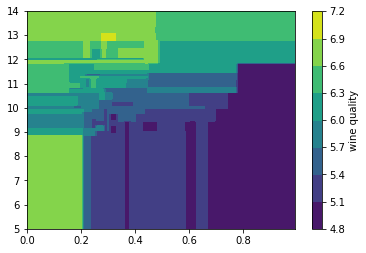

In [126]:
xs = np.arange(0, 1, 0.01)
ys = np.arange(5, 14, 0.01)
samples = list(itertools.product(xs, ys))
zs = clf.predict(samples)
zs = np.array(zs).reshape(len(xs), len(ys)).transpose()
plt.contourf(xs, ys, zs)
cbar = plt.colorbar()
cbar.ax.set_ylabel('wine quality')

c:\users\lenon\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


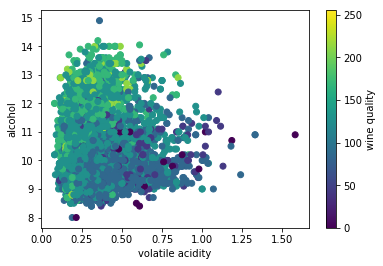

In [142]:
max_y = max(y)
min_y = min(y)
diff = max_y - min_y
plt.scatter([x[0] for x in X], [x[1] for x in X], c=[(sample_y - min_y)/diff * 255 for sample_y in y])
axes = plt.axes()
axes.set_xlabel('volatile acidity')
axes.set_ylabel('alcohol')
cbar = plt.colorbar()
cbar.ax.set_ylabel('wine quality')

pylab.savefig('../charts/max_features.png')